In [5]:
import json

# 加载图片和文字
datas = []
with open("texts/image_texts.json", "r", encoding="utf-8") as f:
    read = json.load(f)
    datas.extend(read)

{'img_path': './images/1.jpg', 'img_desc': '一个蓝色的小书架立在街边的草地上，书架的玻璃门内整齐地摆放着各种书籍，仿佛在等待着爱书的人来取阅，传递着知识与温暖。'}


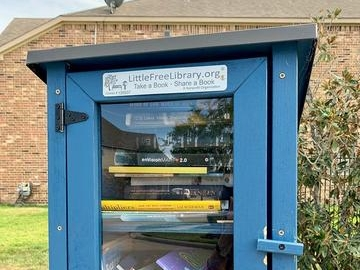

In [6]:
from PIL import Image
data = datas[0]
print(data)
Image.open(data['img_path'])

In [28]:
# 加载模型
from transformers import ChineseCLIPProcessor, ChineseCLIPModel
import torch
import numpy as np

model = ChineseCLIPModel.from_pretrained('../models/AI-ModelScope/chinese-clip-vit-base-patch16')
processor = ChineseCLIPProcessor.from_pretrained('../models/AI-ModelScope/chinese-clip-vit-base-patch16')

In [35]:
# 图像编码
from sklearn.preprocessing import normalize

images_features = []
images_path = [data['img_path'] for data in datas]
images = [Image.open(data['img_path']) for data in datas]
images_input = processor(images = images, return_tensors = 'pt')
with torch.no_grad():
    image_features = model.get_image_features(**images_input)
    image_features = image_features.data.cpu().numpy()
    images_features.append(image_features)
    
images_features = np.vstack(images_features)
images_features = normalize(images_features)
print(images_features.shape)

(10, 512)


In [36]:
# 文本编码
texts_features = []

texts = [data['img_desc'] for data in datas]
texts_input = processor(text = texts, return_tensors = 'pt', padding = True)
with torch.no_grad():
    texts_feature = model.get_text_features(**texts_input)
    texts_feature = texts_feature.data.cpu().numpy()
    texts_features.append(texts_feature)
    
texts_features = np.vstack(texts_features)
texts_features = normalize(texts_features)
print(texts_features.shape)

(10, 512)


In [37]:
# 相似度计算 - 文字计算与每个图片的相似度
query_index = 1
# 点积
sim_result = np.dot(texts_features[query_index], images_features.T)
print(sim_result)
sim_idx = sim_result.argsort()[::-1][0:3]
print(sim_idx)

[0.16629943 0.44859475 0.33940336 0.32756984 0.19786185 0.3260033
 0.30891544 0.20637327 0.24626912 0.16575015]
[1 2 3]


输入文本:  白色的圆桌上放着一套精致的茶具，旁边的盘子里盛着色泽诱人的甜点，可能是阿拉伯茶和干椰枣，营造出一种温馨且充满异域风情的氛围。
jjj


([], [])

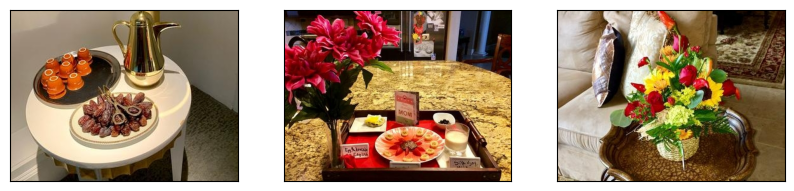

In [41]:
# 画图显示
from matplotlib import pyplot as plt

print('输入文本: ', texts[query_index])

plt.figure(figsize=(10, 5))
plt.subplot(131)
plt.imshow(Image.open(images_path[sim_idx[0]]))
plt.xticks([]);plt.yticks([])

plt.subplot(132)
plt.imshow(Image.open(images_path[sim_idx[1]]))
plt.xticks([]);plt.yticks([])

plt.subplot(133)
plt.imshow(Image.open(images_path[sim_idx[2]]))
plt.xticks([]);plt.yticks([])

In [43]:
# 相似度计算 - 图片计算与每个文本的相似度
query_index = 2
# 点积
sim_result = np.dot(images_features[query_index], texts_features.T)
print(sim_result)
sim_idx = sim_result.argsort()[::-1][0:3]
print(sim_idx)

[0.28211623 0.33940336 0.4834328  0.38049376 0.27364612 0.30577236
 0.278141   0.2755882  0.34717828 0.24926203]
[2 3 8]


识别结果： ['金色的桌面上，一个托盘里放着美味的食物，旁边还有一束鲜艳的红花，这是女儿精心为我准备的生日早餐，每一口都饱含着浓浓的爱意。', '一个精美的托盘上，摆放着一束色彩艳丽的鲜花，花朵娇艳欲滴，这是朋友送的礼物，为房间增添了一抹亮色，也让心情变得格外美好。', '在一个大型场馆内，观众席上坐满了人，远处的竞技场中正在进行牛仔竞技表演，而拍摄者则在豪华套房中，享受着这场精彩的演出，视角独特。']


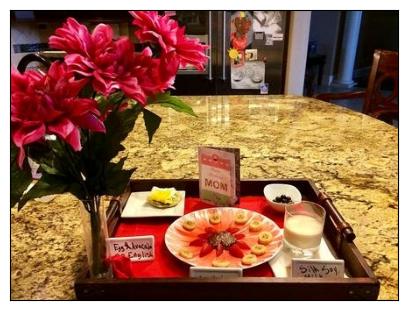

In [46]:
# 画图显示
plt.figure(figsize=(5, 5))
plt.imshow(Image.open(images_path[query_index]))
plt.xticks([]);plt.yticks([])
print("识别结果：", [texts[idx] for idx in sim_idx])

In [51]:
# 标签
import jieba

tags = set()
for text in texts:
    tag = jieba.lcut(text)
    for word in tag:
        if len(word) > 1:
            tags.add(word)
tags = list(tags)

['打开', '装饰', '色彩艳丽', '诉说着', '一种', '观众们', '进行', '情调', '朋友', '棒球场', '咖啡', '玻璃墙', '街边', '演出', '观赛', '精彩', '悠闲', '桌面上', '娇艳欲滴', '海洋生物', '红色', '观看', '一只', '珍珠', '书架', '女儿', '托盘', '温馨', '一束', '坐在', '豪华', '紫色', '还有', '时刻', '装满', '仿佛', '亮色', '垂涎欲滴', '快乐', '金色', '里装', '扑鼻而来', '营造', '鱼儿', '异域', '精美', '早餐', '知识', '亲密', '杯子', '温暖', '色彩', '牛仔', '喜悦', '心情', '礼物', '上放', '生日', '爱书', '红花', '纸盒', '拉花', '美味', '茶具', '她们', '格外', '坐满', '取阅', '尽情', '丰富', '摆放着', '增添', '俯瞰', '眼前', '拍摄者', '笑容', '高处', '书籍', '造型', '手机', '竞技场', '这场', '正在', '享受', '游动', '激情', '圆桌', '洋溢着', '饱含', '爱意', '场馆', '盘子', '张开', '拥抱', '清晰可见', '表演', '精致', '氛围', '屏幕', '这是', '竞技', '草地', '图案', '显得', '一套', '有着', '绝佳', '香气', '立在', '变得', '准备', '草坪', '透过', '鲜花', '双臂', '精心', '两个', '干椰枣', '传递', '女孩', '十分', '人来', '感受', '脸上', '皇冠', '可能', '甜点', '各种', '一杯', '台上', '大型', '纸杯', '等待', '比赛', '巨大', '旁边', '蝴蝶结', '整齐', '水族馆', '跑道', '充满', '绿色', '一部', '食物', '活力', '一抹', '房间', '华丽', '阿拉伯', '蓝色', '浓浓的', '许多', '观众席', '表面', '生活', '手拿着', '玻璃门', '接触', '风情', '蛋糕', '它们', '视角'

In [52]:
# 标签文本编码

tags_features = []
tag_input = processor(text = tags, return_tensors = 'pt', padding = True)
with torch.no_grad():
    tag_feature = model.get_text_features(**tag_input)
    tag_feature = tag_feature.data.cpu().numpy()
    tags_features.append(tag_feature)
    
tags_features = np.vstack(tags_features)
tags_features = normalize(tags_features)
print(tags_features.shape)

(176, 512)


In [53]:
# 相似度 - 计算图片与各个标签的相似度

query_index = 1

sim_result = np.dot(images_features[query_index], tags_features.T)
print(sim_result)
sim_idx = sim_result.argsort()[::-1][0:7]
print(sim_idx)

[0.35577503 0.3755719  0.35491776 0.37238115 0.36182258 0.3092802
 0.355752   0.38237613 0.3400086  0.2783224  0.37954578 0.29861847
 0.34220904 0.35779485 0.34489483 0.37774938 0.3725584  0.36493862
 0.34671763 0.31931964 0.34098786 0.36239216 0.34380117 0.34623027
 0.33794373 0.33098057 0.36869133 0.3953788  0.33595973 0.34220898
 0.3794828  0.33359265 0.37450352 0.36418378 0.3698618  0.38585243
 0.34615564 0.4004643  0.3405251  0.3491856  0.3482662  0.3982054
 0.37251943 0.34136206 0.35135484 0.36573863 0.38140157 0.3266127
 0.34319335 0.37599248 0.37829065 0.35246277 0.3109442  0.33439094
 0.37570173 0.33336467 0.38911915 0.34302443 0.32224536 0.32029596
 0.30412066 0.36770278 0.37932712 0.3807205  0.36532766 0.37367576
 0.37163448 0.38164997 0.3499028  0.37588727 0.40372926 0.38165498
 0.36344028 0.3602559  0.31268904 0.34978744 0.36767244 0.32408807
 0.3539022  0.32322443 0.3183945  0.36924616 0.36483696 0.36613333
 0.33779797 0.35054076 0.41134763 0.35751832 0.37325078 0.3706021

相似标签： ['圆桌', '摆放着', '美好', '垂涎欲滴', '扑鼻而来', '温馨', '生活']


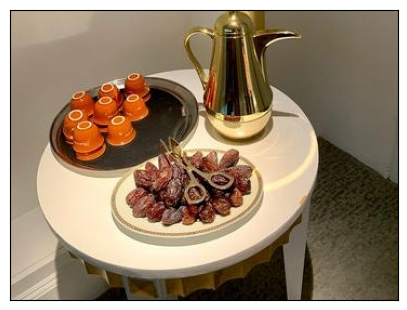

In [54]:
# 画图显示
plt.figure(figsize=(5, 5))
plt.imshow(Image.open(images_path[query_index]))
plt.xticks([]);plt.yticks([])
print("相似标签：", [tags[idx] for idx in sim_idx])